## Quiz IA

### Generamos los datos de muestra con 3 clases

In [16]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
import numpy as np

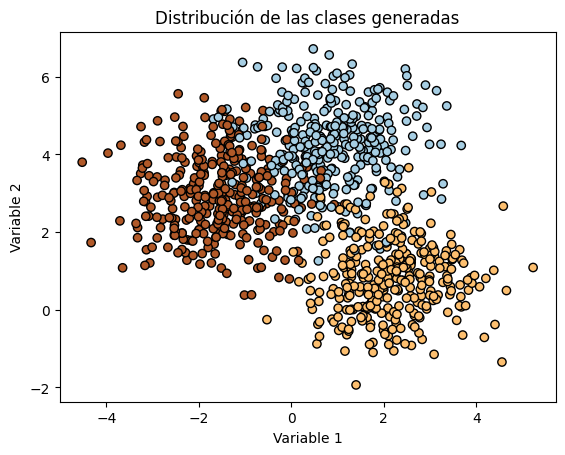

In [17]:
# Generar datos con 3 clases y 2 variables
X, y = make_blobs(n_samples=1000, centers=3, n_features=2, random_state=0)

# Visualizar la distribución de las clases
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired, edgecolors='k', marker='o')
plt.xlabel("Variable 1")
plt.ylabel("Variable 2")
plt.title("Distribución de las clases generadas")
plt.show()

### Implementar la clase PerceptronMulticlass

In [18]:
class PerceptronMulticlass:
    def __init__(self, learning_rate=0.01, num_iterations=1000, num_classes=3):
        self.learning_rate = learning_rate
        self.num_iterations = num_iterations
        self.num_classes = num_classes

    def fit(self, X, y):
        num_samples, num_features = X.shape
        self.W = np.zeros((self.num_classes, num_features))
        self.b = np.zeros(self.num_classes)
        
        for _ in range(self.num_iterations):
            for i in range(num_samples):
                xi = X[i]
                yi = y[i]
                
                for j in range(self.num_classes):
                    zj = np.dot(self.W[j], xi) + self.b[j]
                    y_hat = 1 if zj >= 0 else 0
                    actual_label = 1 if yi == j else 0
                    
                    if y_hat != actual_label:
                        self.W[j] += self.learning_rate * (actual_label - y_hat) * xi
                        self.b[j] += self.learning_rate * (actual_label - y_hat)

    def predict(self, X):
        predictions = []
        for xi in X:
            linear_outputs = [np.dot(w, xi) + b for w, b in zip(self.W, self.b)]
            predictions.append(np.argmax(linear_outputs))
        return predictions

## Visualizar la frontera de decisión

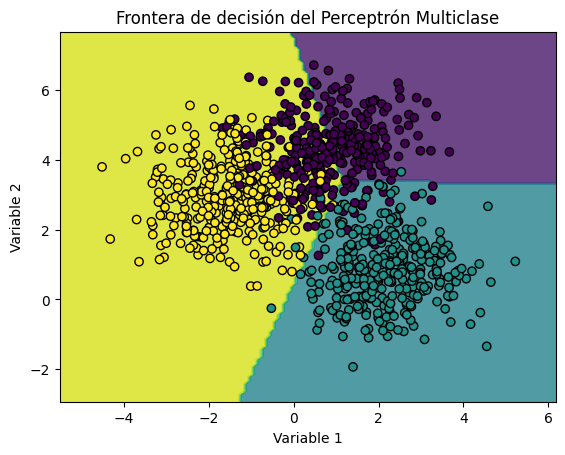

In [20]:
def plot_decision_boundary(perceptron, X, y):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))
    
    Z = perceptron.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = np.array(Z).reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.8)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k')
    plt.xlabel('Variable 1')
    plt.ylabel('Variable 2')
    plt.title('Frontera de decisión del Perceptrón Multiclase')
    plt.show()

# Entrenamiento del perceptrón
perceptron = PerceptronMulticlass(learning_rate=0.1, num_iterations=1000, num_classes=3)
perceptron.fit(X, y)

# Visualización de la frontera
plot_decision_boundary(perceptron, X, y)

## API en Streamlit

2024-09-30 13:53:30.022 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-09-30 13:53:30.274 
  command:

    streamlit run C:\Users\ASUS\anaconda3\envs\my_env\lib\site-packages\ipykernel_launcher.py [ARGUMENTS]
2024-09-30 13:53:30.276 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-09-30 13:53:30.277 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-09-30 13:53:30.279 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-09-30 13:53:30.281 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-09-30 13:53:30.282 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-09-30 13:53:30.283 Thread 'Main

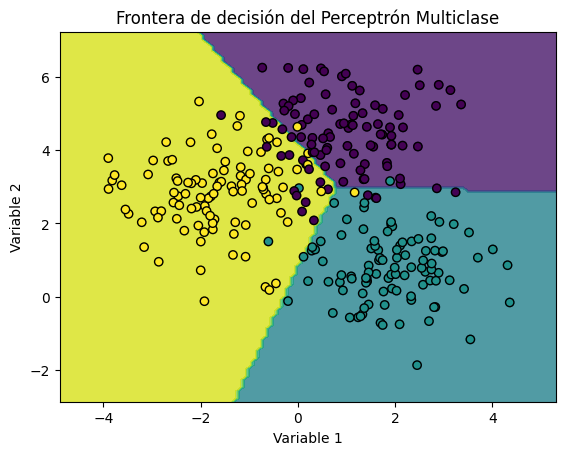

In [21]:
import streamlit as st
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

# Título de la aplicación
st.title("Perceptrón Multiclase")

# Contenedor para generar datos
with st.container():
    st.header("Generar datos de muestra")
    num_samples = st.slider("Número de muestras", min_value=100, max_value=1000, value=300)
    num_classes = st.slider("Número de clases", min_value=2, max_value=5, value=3)
    X, y = make_blobs(n_samples=num_samples, centers=num_classes, n_features=2, random_state=0)
    
    # Visualizar los datos generados
    plt.scatter(X[:, 0], X[:, 1], c=y)
    plt.xlabel("Variable 1")
    plt.ylabel("Variable 2")
    plt.title("Datos Generados")
    st.pyplot(plt)

# Contenedor para el entrenamiento del perceptrón
with st.container():
    st.header("Entrenar Perceptrón Multiclase")
    learning_rate = st.number_input("Tasa de aprendizaje", min_value=0.01, max_value=1.0, value=0.1)
    num_iterations = st.number_input("Número de iteraciones", min_value=100, max_value=10000, value=1000)
    
    # Entrenar el perceptrón
    perceptron = PerceptronMulticlass(learning_rate=learning_rate, num_iterations=num_iterations, num_classes=num_classes)
    perceptron.fit(X, y)
    
    # Visualizar la frontera de decisión
    st.header("Frontera de Decisión")
    plot_decision_boundary(perceptron, X, y)
